## P3: Model development

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
df = pd.read_csv('./completed_file.csv')

In [14]:
df.head()

,Date,Company,State,City,Level,Work_Type,Average_salary
0,2024-06-23,Pci Government Services,Alabama,Huntsville,Senior,On-Site,85000.0
1,2024-06-23,Booz Allen,Alabama,Huntsville,Mid-level,On-Site,123800.0
2,2024-06-23,Booz Allen,Alabama,Huntsville,Senior,On-Site,158300.0
3,2024-06-23,Leidos,Alabama,Huntsville,Mid-level,On-Site,114062.5
4,2024-06-23,Recruiting From Scratch,Alabama,Huntsville,Lead,On-Site,160000.0


__Predict the salary based on job level `SLR`__

In [37]:
# Encode the object data type to int data type

df1 = df[['Level','Average_salary']]
df_encoded = pd.get_dummies(df1, columns=['Level'], dtype=int)

X = df_encoded.drop(columns=['Average_salary']) 
y = df_encoded['Average_salary']

In [38]:
lm = LinearRegression()
lm.fit(X, y)
yhat = lm.predict(X)

- Display the output by plot

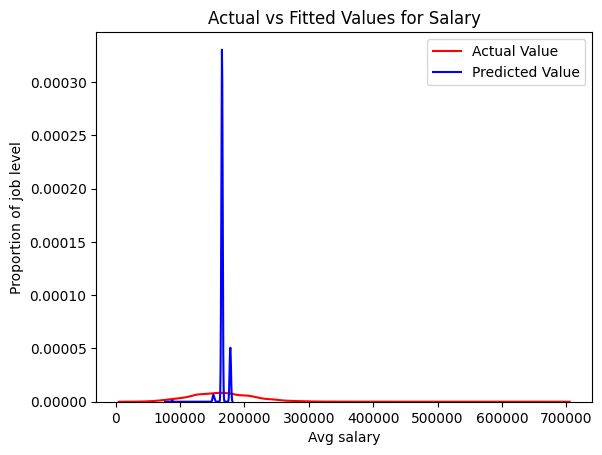

In [16]:
sns.kdeplot(df_encoded['Average_salary'], color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Salary')
plt.xlabel('Avg salary')
plt.ylabel('Proportion of job level')
plt.legend(['Actual Value', 'Predicted Value'])

In [17]:
# Calculayte the R^2 and MSE score

mse_slr = mean_squared_error(df_encoded['Average_salary'], yhat)
r2_score_slr = lm.score(X, y)
print('The R^2 for SLR Level is: ', r2_score_slr)
print('The MSE for SLR Level is: ', mse_slr)

The R^2 for SLR Level is:  0.014315100320837937
The MSE for SLR Level is:  2670547124.515937


__Predict the salary based on company `SLR`__

In [39]:
df1 = df[['Company','Average_salary']]
df_encoded1 = pd.get_dummies(df1, columns=['Company'], dtype=int)
X1 = df_encoded1.drop(columns=['Average_salary']) 
y = df_encoded1['Average_salary']

In [40]:
# Create and fit the model
lm1 = LinearRegression()
lm1.fit(X1, y)
yhat1 = lm1.predict(X1)

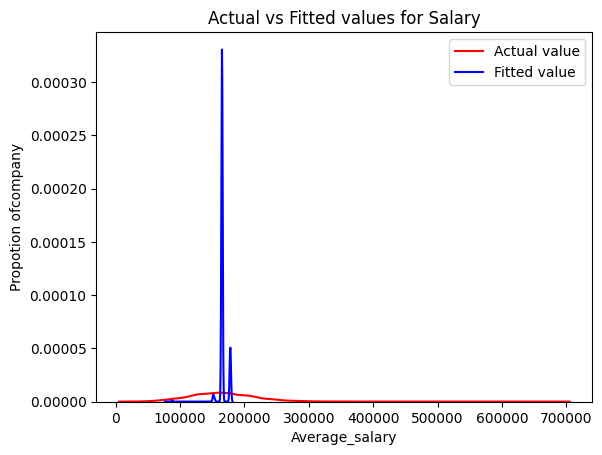

In [41]:
# Visualize the predicted values vs actual values

sns.kdeplot(df_encoded['Average_salary'], color='r', label ='Actual value')
sns.kdeplot(yhat, color= 'b', label = 'Fitted value')

plt.title('Actual vs Fitted values for Salary')
plt.xlabel('Average_salary')
plt.ylabel('Propotion ofcompany')
plt.legend(['Actual value', 'Fitted value'])

In [42]:
# Calculate the R-square and MSE score

print('The R^2 for SLR Company is:', lm1.score(X1,y))
print('The MSE for SLR Company is:', mean_squared_error(df_encoded1['Average_salary'], yhat1))

The R^2 for SLR Company is: 0.6295416619126124
The MSE for SLR Company is: 1003694436.0761222


__Predict the salary base on all features available in the dataset `MSL`__

In [44]:
df2 = df.copy()
df_encoded2 = pd.get_dummies(df2, columns = ['Date','Company', 'State', 'City', 'Level', 'Working Mode'], dtype = int)

In [45]:
z = df_encoded2.drop(columns = 'Average_salary')

In [46]:
lm2 = LinearRegression()
lm2.fit(z,y)
yhat2 = lm2.predict(z)

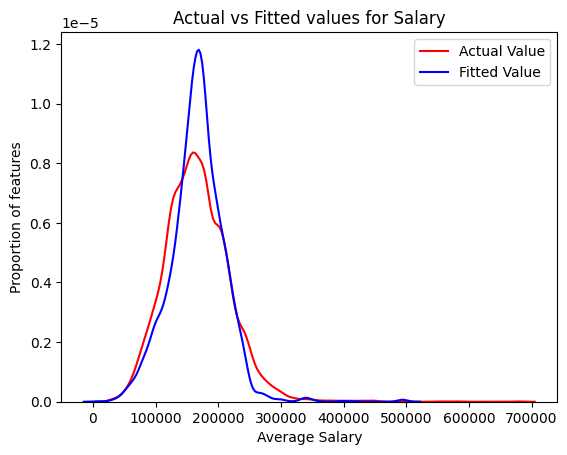

In [47]:
sns.kdeplot(df_encoded2['Average_salary'], color="r", label="Actual Value")

sns.kdeplot(yhat2, color="b", label="Fitted Values" )

plt.title('Actual vs Fitted values for Salary')
plt.xlabel('Average Salary')
plt.ylabel('Proportion of features')
plt.legend(['Actual Value','Fitted Value'])

In [48]:
mse_slr1 = mean_squared_error(df_encoded2['Average_salary'], yhat2)
r2_score_slr1 = lm2.score(z, y)
print('The R^2 for MLR is: ', r2_score_slr1)
print('The MSE for MLR is: ', mse_slr1)

The R^2 for MLR is:  0.6947314456422276
The MSE for MLR is:  827073703.0775683


__`Polynomial` model using 'Level' variable. Try this for 3 different values of polynomial degrees__

In [49]:
level_mapping = {
    'Entry-level': 0,
    'Graduate': 0,
    'Junior': 1,
    'Associate': 1,
    'Mid-level': 2,
    'Senior': 3,
    'Lead': 4,
    'Manager': 5
}

# Map values and create new column
df['Level_numeric'] = df['Level'].map(level_mapping)

In [50]:
X = df['Level_numeric'].to_numpy().flatten()
y = df['Average_salary']
f1 = np.polyfit(X, y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, y, 5)
p5 = np.poly1d(f5)

In [51]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Salary ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Average Salary')

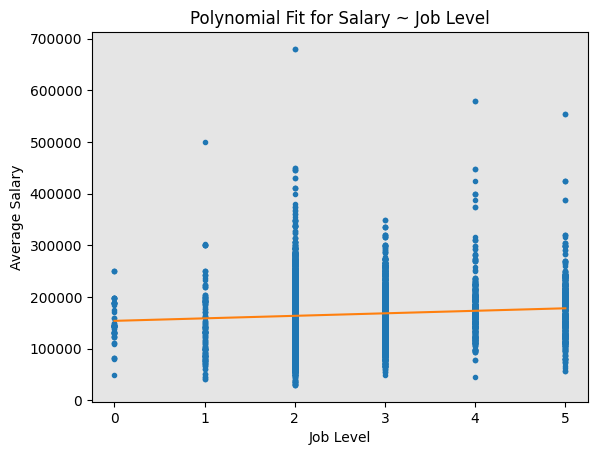

In [52]:
PlotPolly(p1, X, y, 'Job Level')

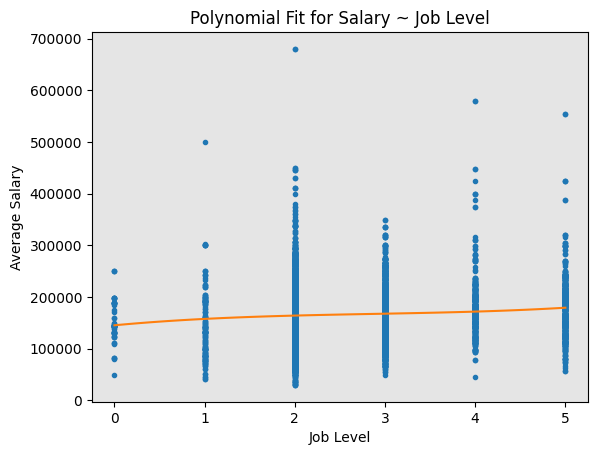

In [53]:
PlotPolly(p3, X, y, 'Job Level')

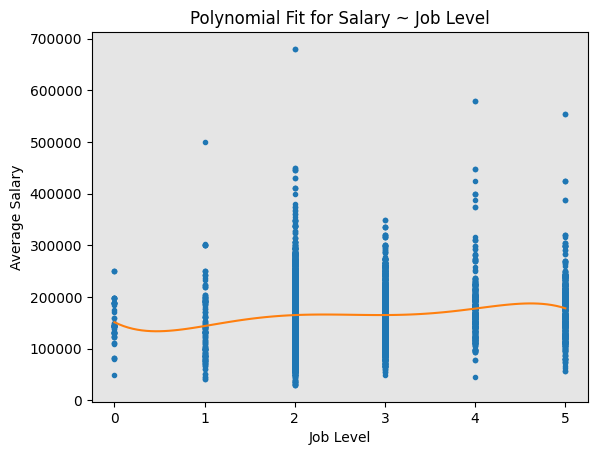

In [54]:
PlotPolly(p5, X, y, 'Job Level')

In [55]:
#  Calculate R^2 and MSE score

r_squared_1 = r2_score(y, p1(X))
print('The R^2 for 1st degree polynomial is: ', r_squared_1)
print('The MSE for 1st degree polynomial is: ', mean_squared_error(y,p1(X)))
print('--------')
r_squared_3 = r2_score(y, p3(X))
print('The R^2 for 3rd degree polynomial is: ', r_squared_3)
print('The MSE for 3rd degree polynomial is: ', mean_squared_error(y,p3(X)))
print('--------')
r_squared_5 = r2_score(y, p5(X))
print('The R^2 for 5th degree polynomial is: ', r_squared_5)
print('The MSE for 5th degree polynomial is: ', mean_squared_error(y,p5(X)))

The R^2 for 1st degree polynomial is:  0.007720277025286437
The MSE for 1st degree polynomial is:  2688414686.8518906
--------
The R^2 for 3rd degree polynomial is:  0.008099159501600228
The MSE for 3rd degree polynomial is:  2687388168.632956
--------
The R^2 for 5th degree polynomial is:  0.011105512947754081
The MSE for 5th degree polynomial is:  2679242960.6120987


--> The 5th degree is better fit compared to the 1st and 3rd degree polynomial

### Conclusion

In [33]:
print('The R^2 for SLR Level is: ', r2_score_slr)
print('The MSE for SLR Level is: ', mse_slr)
print('-'*80)
print('The R^2 for MLR is: ', r2_score_slr1)
print('The MSE for MLR is: ', mse_slr1)
print('-'*80)
print('The R^2 for 5th degree polynomial is: ', r_squared_5)
print('The MSE for 5th degree polynomial is: ', mean_squared_error(y,p5(X)))
print('-'*80)

The R^2 for SLR Level is:  0.014315100320837937
The MSE for SLR Level is:  2670547124.515937
--------------------------------------------------------------------------------
The R^2 for MLR is:  0.694260102488206
The MSE for MLR is:  828350727.9209461
--------------------------------------------------------------------------------
The R^2 for 5th degree polynomial is:  0.011105512947754081
The MSE for 5th degree polynomial is:  2679242960.6120987
--------------------------------------------------------------------------------


__Conclusion__

- The analysis demonstrates that the multiple linear regression model is the best choice for salary prediction. With a R-squared value and minimal MSE, this model effectively captures the complexities of various influencing factors. 

- By leveraging multiple relevant predictors, it not only enhances the accuracy of salary forecasts but also provides invaluable insights for both job seekers and employers. Investing in this approach empowers stakeholders to make informed decisions, ultimately leading to a more equitable and efficient job market.